# EDA


- The os module has a perfect method to list files in a directory.
- Pandas json normalize could work here but is not necessary to convert the JSON data to a dataframe.
- You may need a nested for-loop to access each sale!
- We've put a lot of time into creating the structure of this repository, and it's a good example for future projects.  In the file functions_variables.py, there is an example function that you can import and use.  If you have any variables, functions or classes that you want to make, they can be put in the functions_variables.py file and imported into a notebook.  Note that only .py files can be imported into a notebook. If you want to import everything from a .py file, you can use the following:
```python
from functions_variables import *
```
If you just import functions_variables, then each object from the file will need to be prepended with "functions_variables"\
Using this .py file will keep your notebooks very organized and make it easier to reuse code between notebooks.

In [1]:
# (this is not an exhaustive list of libraries)
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint
from functions_variables import encode_tags
import seaborn as sns

## Data Importing

In [2]:
# load one file first to see what type of data you're dealing with and what attributes it has
with open('../data/AK_Juneau_1.json', 'r') as f:
    jdata = json.load(f)

In [3]:
# check the keys
jdata.keys()
jdata['data'].keys()
data = jdata['data']['results']

# unpack nested json dictionary
df = pd.json_normalize(data)
df 

,primary_photo,last_update_date,source,tags,permalink,status,list_date,open_houses,branding,list_price,...,location.county.fips_code,location.county.name,source.plan_id,source.agents,source.spec_id,source.type,products.brand_name,location.address.coordinate.lon,location.address.coordinate.lat,other_listings
0,None,None,NaN,None,8477-Thunder-Mountain-Rd_Juneau_AK_99801_M9424...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,None,NaN,None,4515-Glacier-Hwy_Juneau_AK_99801_M94790-68516,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,None,NaN,None,17850-Point-Stephens-Rd_Juneau_AK_99801_M98793...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,NaN,None,9951-Stephen-Richards-Memorial-Dr_Juneau_AK_99...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,2023-08-04T22:49:14Z,NaN,"[carport, hill_or_mountain_view, ocean_view, s...",11909-Glacier-Hwy-Apt-105_Juneau_AK_99801_M741...,sold,2023-08-21T21:01:22.000000Z,None,[{'name': 'Platinum Keller Williams Realty Ala...,415000.0,...,None,Juneau,NaN,[{'office_name': 'Platinum Keller Williams Rea...,NaN,mls,basic_opt_in,-134.649067,58.386651,NaN
5,None,2023-08-04T21:31:44Z,NaN,"[city_view, community_outdoor_space, community...",808-5th-St_Juneau_AK_99801_M76604-90777,sold,2023-08-21T21:01:22.000000Z,None,"[{'name': 'Southeast Alaska Real Estate', 'pho...",835000.0,...,None,Juneau,NaN,[{'office_name': 'Southeast Alaska Real Estate...,NaN,mls,essentials,-134.403991,58.304573,NaN
6,None,2023-12-07,NaN,None,4446-Trafalgar-Ave_Juneau_AK_99801_M82741-21172,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,-134.553717,58.396178,NaN


In [4]:
# get all columns from df
for col in df:
    print(col)

primary_photo
last_update_date
source
tags
permalink
status
list_date
open_houses
branding
list_price
property_id
photos
community
products
virtual_tours
listing_id
price_reduced_amount
matterport
description.year_built
description.baths_3qtr
description.sold_date
description.sold_price
description.baths_full
description.name
description.baths_half
description.lot_sqft
description.sqft
description.baths
description.sub_type
description.baths_1qtr
description.garage
description.stories
description.beds
description.type
lead_attributes.show_contact_an_agent
flags.is_new_construction
flags.is_for_rent
flags.is_subdivision
flags.is_contingent
flags.is_price_reduced
flags.is_pending
flags.is_foreclosure
flags.is_plan
flags.is_coming_soon
flags.is_new_listing
other_listings.rdc
location.address.postal_code
location.address.state
location.address.coordinate
location.address.city
location.address.state_code
location.address.line
location.street_view_url
location.county.fips_code
location.count

In [5]:
# loop over all files and put them into a dataframe

In [6]:
# directory path to JSON files
dir_path = '../data'

# create an empty list to store dataframes
dfs = []

# iterate over all JSON files in the directory
for filename in os.listdir(dir_path):
    if filename.endswith('.json'):
        file_path = os.path.join(dir_path, filename)
        
        # open and read each JSON file
        with open(file_path, 'r') as file:
            jdata = json.load(file)  # load JSON data
        data = jdata['data']['results']
        
        # normalize the JSON data (assuming similar structure in all files)
        df = pd.json_normalize(data, sep='_')  
        
        # append the df to the list
        dfs.append(df)

# concatenate all dfs into a single one
final_df = pd.concat(dfs, ignore_index=True)

# final df
final_df

C:\Users\werwa\AppData\Local\Temp\ipykernel_3548\2435930214.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat(dfs, ignore_index=True)


,last_update_date,tags,permalink,status,list_date,open_houses,branding,list_price,property_id,photos,...,location_county_fips_code,location_county_name,primary_photo,source,products,location_address_coordinate,other_listings,community_advertisers,community_description_name,location_county
0,2023-09-19T20:52:50Z,"[carport, community_outdoor_space, cul_de_sac,...",9453-Herbert-Pl_Juneau_AK_99801_M90744-30767,sold,2023-06-29T21:16:25.000000Z,None,"[{'name': 'EXP Realty LLC - Southeast Alaska',...",554950.0,9074430767,"[{'tags': [{'label': 'house_view', 'probabilit...",...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,None,8477-Thunder-Mountain-Rd_Juneau_AK_99801_M9424...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9424983842,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,None,4515-Glacier-Hwy_Juneau_AK_99801_M94790-68516,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9479068516,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,17850-Point-Stephens-Rd_Juneau_AK_99801_M98793...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9879331943,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,None,9951-Stephen-Richards-Memorial-Dr_Juneau_AK_99...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9521639574,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
final_df.to_csv("../data/housing_df.csv", index = False)

## Data Cleaning and Wrangling

At this point, ensure that you have all sales in a dataframe.
- Take a quick look at your data (i.e. `.info()`, `.describe()`) - what do you see?
- Is each cell one value, or do some cells have lists?
- What are the data types of each column?
- Some sales may not actually include the sale price (target).  These rows should be dropped.
- There are a lot of NA/None values.  Should these be dropped or replaced with something?
    - You can drop rows or use various methods to fills NA's - use your best judgement for each column 
    - i.e. for some columns (like Garage), NA probably just means no Garage, so 0
- Drop columns that aren't needed
    - Don't keep the list price because it will be too close to the sale price. Assume we want to predict the price of houses not yet listed

In [8]:
df = pd.read_csv('housing_df.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8191 entries, 0 to 8190
Data columns (total 68 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             8191 non-null   int64  
 1   last_update_date                       8125 non-null   object 
 2   tags                                   7638 non-null   object 
 3   permalink                              8159 non-null   object 
 4   status                                 8159 non-null   object 
 5   list_date                              7752 non-null   object 
 6   open_houses                            0 non-null      float64
 7   branding                               8159 non-null   object 
 8   list_price                             7721 non-null   float64
 9   property_id                            8159 non-null   float64
 10  photos                                 7403 non-null   object 
 11  comm

In [10]:
column_names_list = df.columns.tolist()
print(len(column_names_list))

68


In [11]:
duplicates = df[df.duplicated(column_names_list)]
duplicates

,Unnamed: 0,last_update_date,tags,permalink,status,list_date,open_houses,branding,list_price,property_id,...,location_county_fips_code,location_county_name,primary_photo,source,products,location_address_coordinate,other_listings,community_advertisers,community_description_name,location_county


In [12]:
# drop unnecessary columns

    # fully null columns
null_columns_ls = df.columns[df.isnull().all()].tolist()
df = df.drop(columns = null_columns_ls)

    # almost null columns
almost_null_columns = ['source_plan_id', 
                       'source_spec_id', 
                       'flags_is_foreclosure',
                       'community_advertisers', 
                       'community_description_name'
                      ]
df = df.drop(columns = almost_null_columns)

    # columns that will not be needed for the model
unnecessary_columns = ['last_update_date', 
                       'permalink', 
                       'status', 
                       'list_date', 
                       'branding', 
                       'list_price', 
                       'property_id', 
                       'photos',  
                       'virtual_tours', 
                       'listing_id', 
                       'price_reduced_amount', 
                       'matterport', 
                       'primary_photo_href', 
                       'source_agents', 
                       'source_type',
                       'other_listings_rdc',
                       'products_brand_name',
                       'flags_is_new_listing',
                       'lead_attributes_show_contact_an_agent',
                       'location_street_view_url',
                       'location_county_fips_code',
                       'location_address_coordinate_lon',
                       'location_address_coordinate_lat',
                       'flags_is_price_reduced',
                       'description_sub_type'
                      ]
df = df.drop(columns = unnecessary_columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8191 entries, 0 to 8190
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    8191 non-null   int64  
 1   tags                          7638 non-null   object 
 2   description_year_built        7316 non-null   float64
 3   description_baths_3qtr        566 non-null    float64
 4   description_sold_date         8159 non-null   object 
 5   description_sold_price        6716 non-null   float64
 6   description_baths_full        7311 non-null   float64
 7   description_baths_half        2281 non-null   float64
 8   description_lot_sqft          6991 non-null   float64
 9   description_sqft              7323 non-null   float64
 10  description_baths             7980 non-null   float64
 11  description_garage            4448 non-null   float64
 12  description_stories           6260 non-null   float64
 13  des

In [13]:
# deal with null rows
    # for 'description_sold_price', which is our target variable, we will drop null rows. 6716
df.dropna(subset=['description_sold_price'], inplace=True) # we should have 6716 rows now
df.shape

(6716, 21)

In [14]:
df

,Unnamed: 0,tags,description_year_built,description_baths_3qtr,description_sold_date,description_sold_price,description_baths_full,description_baths_half,description_lot_sqft,description_sqft,...,description_garage,description_stories,description_beds,description_type,location_address_postal_code,location_address_state,location_address_city,location_address_state_code,location_address_line,location_county_name
30,30,"['central_air', 'central_heat', 'community_out...",1998.0,NaN,2024-01-16,129900.0,2.0,NaN,11761.0,1478.0,...,2.0,1.0,3.0,single_family,36117.0,Alabama,Montgomery,AL,501 Moorfield Ln,Montgomery
31,31,"['city_view', 'hardwood_floors', 'two_or_more_...",1945.0,NaN,2024-01-16,88500.0,2.0,NaN,6534.0,1389.0,...,1.0,2.0,4.0,single_family,36107.0,Alabama,Montgomery,AL,2326 Winona Ave,Montgomery
32,32,"['carport', 'central_air', 'central_heat', 'di...",1969.0,NaN,2024-01-16,145000.0,2.0,NaN,17424.0,2058.0,...,NaN,1.0,3.0,single_family,36109.0,Alabama,Montgomery,AL,115 Lookout Ridge Rd,Montgomery
33,33,"['carport', 'central_air', 'city_view', 'commu...",1955.0,NaN,2024-01-16,65000.0,2.0,NaN,9712.0,1432.0,...,NaN,1.0,3.0,single_family,36107.0,Alabama,Montgomery,AL,611 Glenmore Rd,Montgomery
34,34,"['city_view', 'single_story', 'big_yard', 'fen...",1984.0,NaN,2024-01-12,169000.0,2.0,NaN,10890.0,1804.0,...,NaN,1.0,3.0,single_family,36106.0,Alabama,Montgomery,AL,1819 E Trinity Blvd,Montgomery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,8181,"['central_air', 'forced_air', 'basement', 'two...",1910.0,NaN,2023-07-27,99000.0,1.0,NaN,4792.0,1214.0,...,1.0,2.0,3.0,single_family,25314.0,West Virginia,Charleston,WV,1008 Oakmont Rd,Kanawha
8182,8182,"['basement', 'big_lot']",NaN,NaN,2023-07-27,29700.0,1.0,NaN,7841.0,988.0,...,NaN,NaN,3.0,single_family,25387.0,West Virginia,Charleston,WV,1041 Temple St,Kanawha
8183,8183,"['basement', 'big_lot']",NaN,NaN,2023-07-24,162250.0,1.0,NaN,65340.0,1470.0,...,NaN,NaN,3.0,single_family,25314.0,West Virginia,Charleston,WV,238 Oakwood Rd,Kanawha
8184,8184,['rental_property'],NaN,NaN,2023-07-24,63800.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,single_family,25302.0,West Virginia,Charleston,WV,408 Lee St W,Kanawha


In [15]:
# Fill null values with 0, assuming that for the features listed below, a null value indicates the absence of that feature.
df['description_baths_3qtr'] = df['description_baths_3qtr'].fillna(0)
df['description_baths_full'] = df['description_baths_full'].fillna(0)
df['description_baths_half'] = df['description_baths_half'].fillna(0)
df['description_baths'] = df['description_baths'].fillna(0)
df['description_stories'] = df['description_stories'].fillna(0)
df['description_beds'] = df['description_beds'].fillna(0)
df['description_garage'] = df['description_garage'].fillna(0)

In [16]:
# Fill null values with mean for sq ft of the lot and house
df['description_lot_sqft'] = df['description_lot_sqft'].fillna(df['description_lot_sqft'].mean())
df['description_sqft'] = df['description_sqft'].fillna(df['description_sqft'].mean())

In [17]:
# Calculate median for description_year_built
year_built_median = df['description_year_built'].median()
year_built_median_int = int(year_built_median)
year_built_median_int

1972

In [18]:
# Fill null values for year built with the median
df['description_year_built'] = df['description_year_built'].fillna(year_built_median_int)

In [19]:
# Fill null values for description_type with the most frequent value
df['description_type'] = df['description_type'].fillna(df['description_type'].mode()[0])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6716 entries, 30 to 8185
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    6716 non-null   int64  
 1   tags                          6330 non-null   object 
 2   description_year_built        6716 non-null   float64
 3   description_baths_3qtr        6716 non-null   float64
 4   description_sold_date         6716 non-null   object 
 5   description_sold_price        6716 non-null   float64
 6   description_baths_full        6716 non-null   float64
 7   description_baths_half        6716 non-null   float64
 8   description_lot_sqft          6716 non-null   float64
 9   description_sqft              6716 non-null   float64
 10  description_baths             6716 non-null   float64
 11  description_garage            6716 non-null   float64
 12  description_stories           6716 non-null   float64
 13  descrip

In [21]:
# We still have some nulls for the object type columns such as: tags (will be dealt later on), description_type , location_address_city, location_address_line, location_county_name

<Axes: >

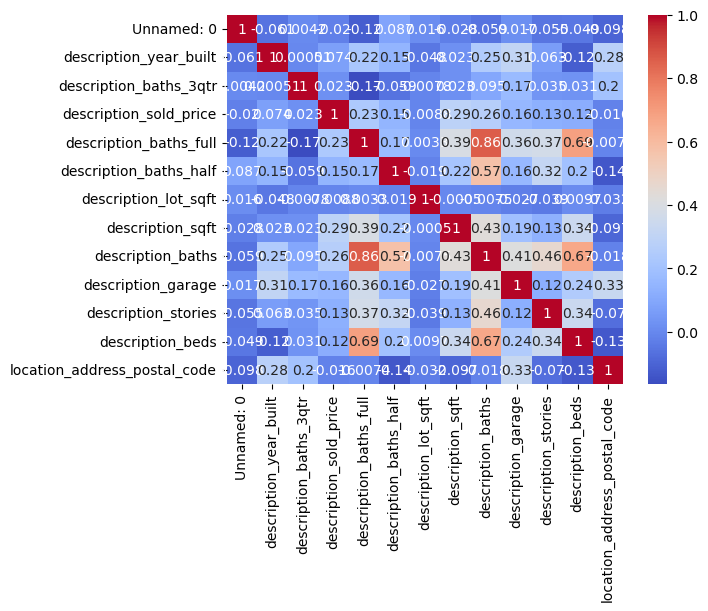

In [22]:
# This will be moved to EDA/ Visualization - then we can remove redundant baths columns

numeric_df = df.select_dtypes(include = ["float64", "int64"])

correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")

In [23]:
# load and concatenate data here
# drop or replace values as necessary

### Dealing with Tags

Consider the fact that with tags, there are a lot of categorical variables.
- How many columns would we have if we OHE tags, city and state?
- Perhaps we can get rid of tags that have a low frequency.

In [24]:
# OHE categorical variables/ tags here
# tags will have to be done manually

### Dealing with Cities

- Sales will vary drastically between cities and states.  Is there a way to keep information about which city it is without OHE?
- Could we label encode or ordinal encode?  Yes, but this may have undesirable effects, giving nominal data ordinal values.
- What we can do is use our training data to encode the mean sale price by city as a feature (a.k.a. Target Encoding)
    - We can do this as long as we ONLY use the training data - we're using the available data to give us a 'starting guess' of the price for each city, without needing to encode city explicitly
- If you replace cities or states with numerical values (like the mean price), make sure that the data is split so that we don't leak data into the training selection. This is a great time to train test split. Compute on the training data, and join these values to the test data
- Note that you *may* have cities in the test set that are not in the training set. You don't want these to be NA, so maybe you can fill them with the overall mean

In [25]:
# perform train test split here
# do something with state and city

## Extra Data - STRETCH

> This doesn't need to be part of your Minimum Viable Product (MVP). We recommend you write a functional, basic pipeline first, then circle back and join new data if you have time

> If you do this, try to write your downstream steps in a way it will still work on a dataframe with different features!

- You're not limited to just using the data provided to you. Think/ do some research about other features that might be useful to predict housing prices. 
- Can you import and join this data? Make sure you do any necessary preprocessing and make sure it is joined correctly.
- Example suggestion: could mortgage interest rates in the year of the listing affect the price? 

In [26]:
# import, join and preprocess new data here

## EDA/ Visualization

Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.    
    - Consider transforming very skewed variables
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
    - You may have too many features to do this, in which case you can simply compute the most correlated feature-pairs and list them
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

In [27]:
# perform EDA here

## Scaling and Finishing Up

Now is a great time to scale the data and save it once it's preprocessed.
- You can save it in your data folder, but you may want to make a new `processed/` subfolder to keep it organized